# Customer Churn Predictions

In [75]:
#import lib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [76]:
#reading csv files
df = pd.read_csv('https://raw.githubusercontent.com/nullbytee/DigitalSkola_DataScience_Batch11/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [77]:
#show 5 row dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
#show dataset dimensions
df.shape

(7043, 21)

In [79]:
#show all columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [80]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
#checking any null values or missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [82]:
#show sstatistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [83]:
#customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

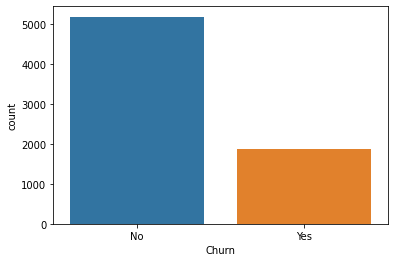

In [84]:
#churn customer visualization
sns.countplot(df['Churn'])


In [85]:
#percentage of leaving customer
per_retained = df[df.Churn == 'No'].shape[0]
per_churned = df[df.Churn == 'Yes'].shape[0]

#print percentage stay customer
print(per_retained / (per_retained + per_churned) * 100, '% Customer Stay.')

#print percentage leaving customer
print(per_churned / (per_retained + per_churned) * 100, '% Customer Left.')

73.4630129206304 % Customer Stay.
26.536987079369588 % Customer Left.


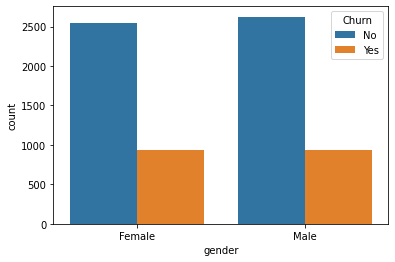

In [86]:
#visualization count of Female and Male
sns.countplot(x='gender', hue='Churn', data=df)

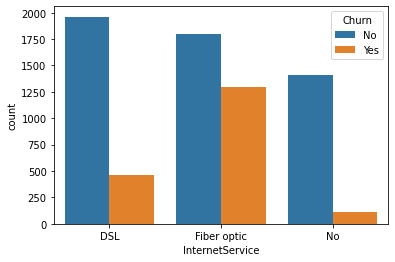

In [87]:
#visualize churn count for internet service
sns.countplot(x='InternetService', hue='Churn', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8250ff890>,
      dtype=object)

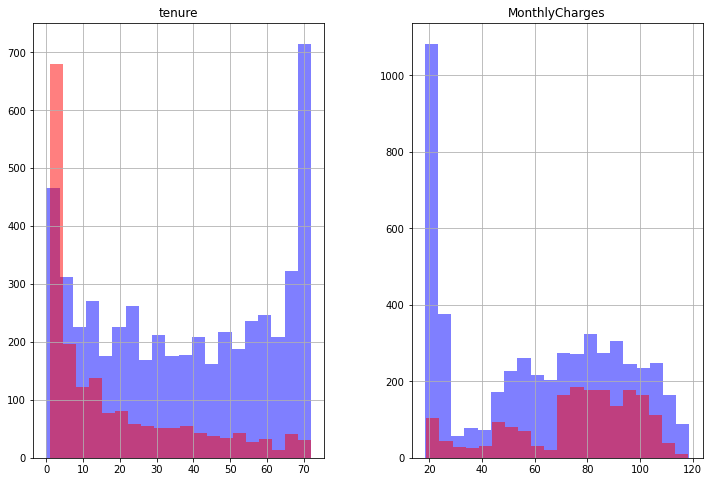

In [102]:
#visualize tenure and monthly chargers histogram
numerical_features = ['tenure','MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(12,8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)

In [91]:
#removing unnecessary columns
cleaned_df = df.drop('customerID', axis=1)

In [92]:
#show result after removing
cleaned_df.shape

(7043, 20)

In [93]:
#convert non-numerical to numerical
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number:
    continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

In [94]:
#show data types after converting
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [95]:
#show dataset after converting
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [96]:
#features data set
x = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

x = StandardScaler().fit_transform(x)

In [97]:
#split data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [98]:
#create model
model = LogisticRegression()
#train model
model.fit(x_train, y_train)

LogisticRegression()

In [99]:
#create prediction on data test
predictions = model.predict(x_test)

#print predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [100]:
#check precision,recall,f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

